In [1]:
import numpy as np
import random
from itertools import product
from torch import tensor
import pickle
import matplotlib.pyplot as plt
import torch
import io

In [2]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [3]:
with open('kfc_big_results.pkl', 'rb') as f:
    arr = CPU_Unpickler(f).load()
    test_accuracy_history_kfc = arr["acc"]
    test_loss_history_kfc = arr["loss"]
    loss_in_training_kfc = arr["loss_train"]
    time_learning_kfc = arr["time"]

In [4]:
colors = ['red', 'orange', 'deeppink', 'violet', 'mediumaquamarine', 'yellow', 'lime', 'gold', 'teal', 'royalblue', 'cyan', 'purple']

In [5]:
plt.rc('xtick', labelsize=23)
plt.rc('ytick', labelsize=23)

In [6]:
del test_accuracy_history_kfc['schedule_0.5']

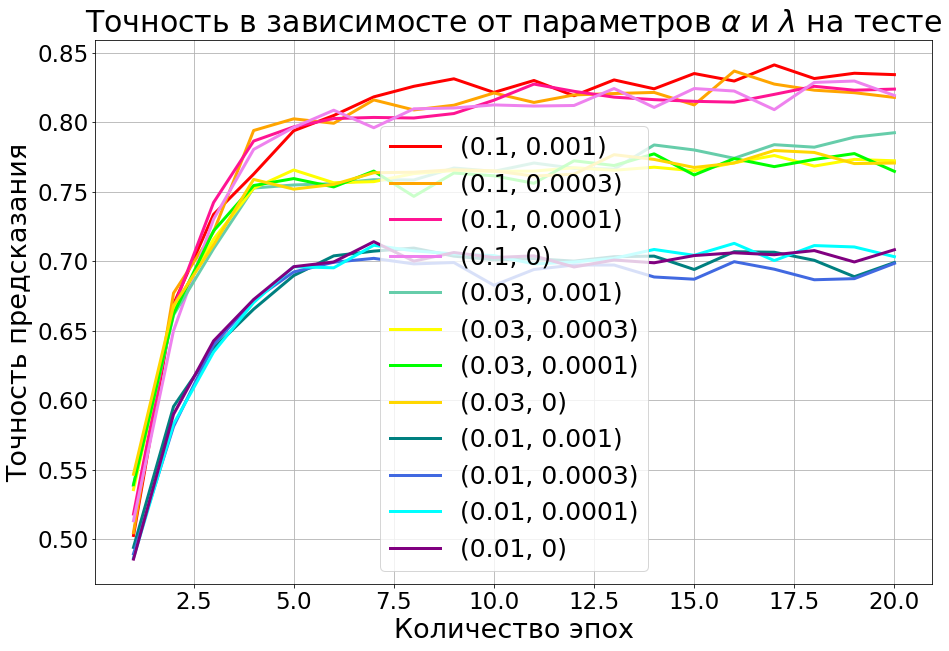

In [7]:
fig = plt.figure(figsize = (15, 10))
plt.title(r'Точность в зависимосте от параметров $\alpha$ и $\lambda$ на тесте', fontsize=30)
plt.xlabel('Количество эпох', fontsize=27)
plt.ylabel('Точность предсказания', fontsize=27)
j = 0
for param, accuracy in test_accuracy_history_kfc.items():
    plt.plot(range(1, 21), accuracy, label = str(param), linewidth=3, color=colors[j])
    j += 1
plt.legend(fontsize = 25)
plt.grid(True)

plt.savefig('Test_accuracy_history_kfc.pdf')

In [8]:
del test_loss_history_kfc['schedule_0.5']

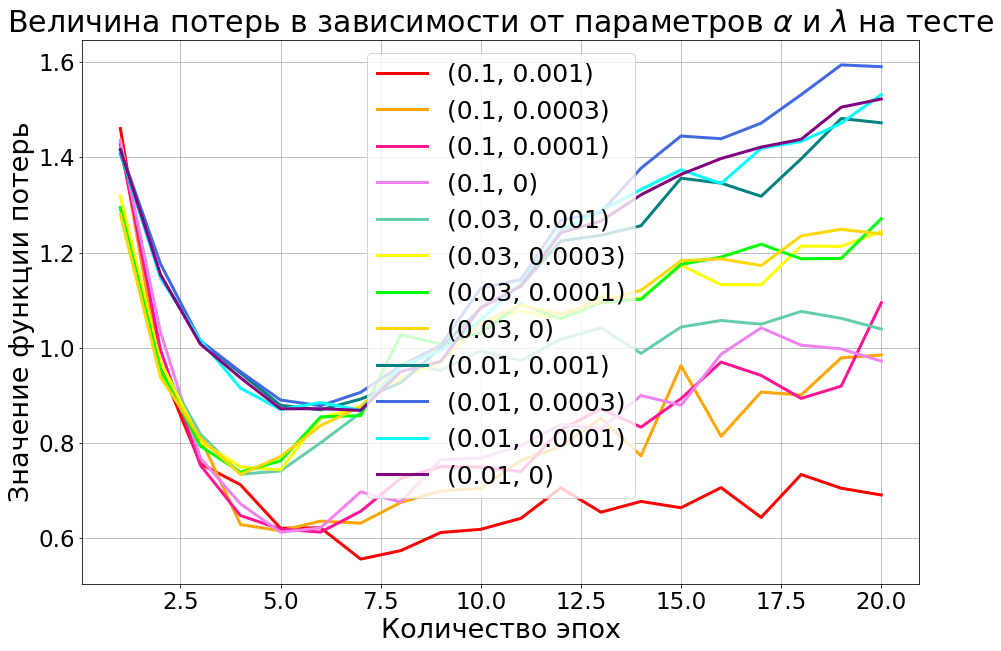

In [9]:
fig = plt.figure(figsize = (15, 10))
plt.title(r'Величина потерь в зависимости от параметров $\alpha$ и $\lambda$ на тесте', fontsize=30)
plt.xlabel('Количество эпох', fontsize=27)
plt.ylabel('Значение функции потерь', fontsize=27)
j = 0
for param, loss in test_loss_history_kfc.items():
    plt.plot(range(1, 21), list(map(lambda x: x.item(), loss)), label = str(param), linewidth=3, color=colors[j])
    j += 1
plt.legend(fontsize = 25)
plt.grid(True)

plt.savefig('Test_loss_history_kfc.pdf')

In [10]:
del loss_in_training_kfc['schedule_0.5']

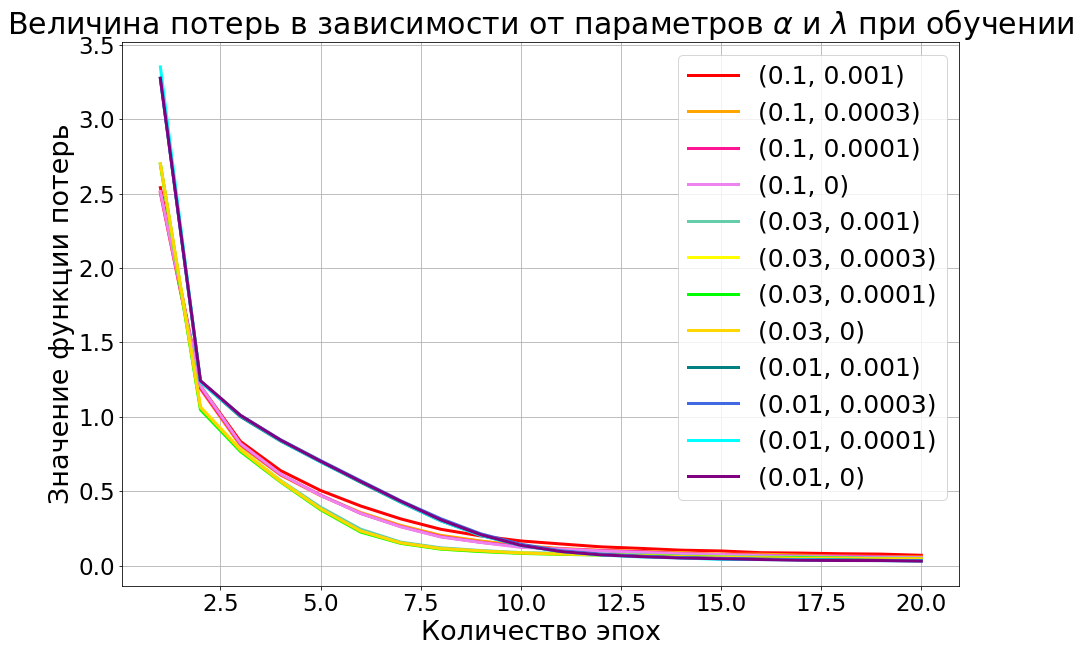

In [11]:
fig = plt.figure(figsize = (15, 10))
plt.title(r'Величина потерь в зависимости от параметров $\alpha$ и $\lambda$ при обучении', fontsize=30)
plt.xlabel('Количество эпох', fontsize=27)
plt.ylabel('Значение функции потерь', fontsize=27)
j = 0
for param, loss in loss_in_training_kfc.items():
    plt.plot(range(1, 21), loss, label = str(param), linewidth=3, color=colors[j])
    j += 1
plt.legend(fontsize = 25)
plt.grid(True)

plt.savefig('Train_loss_history_kfc.pdf')